<a href="https://colab.research.google.com/github/Arkasom/Machine_Learning_Works/blob/main/Task_3_Level_3_Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK-3(Level-3(Advanced))

# Description: Build a simple feed-forward neural network using TensorFlow/Keras for classification tasks

# Objectives:
* Load and preprocess the dataset.
* Design a neural network architecture (input layer, hidden layers, and output layer).
* Train the model using backpropagation.
* Evaluate the model using accuracy and visualize the training/validation loss
* Tools: Python, TensorFlow/Keras, pandas, matplotlib

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('churn-bigml-80.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.shape

(2666, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Preprocessing

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
object_cols = df.select_dtypes(exclude=np.number).columns.tolist()

In [ ]:
numerical_cols

['Account length',
 'Area code',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

In [ ]:
object_cols

['State', 'International plan', 'Voice mail plan', 'Churn']

In [ ]:
for col in object_cols:
  print(df[col].nunique())

51
2
2
2


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [ ]:
scaler = StandardScaler()
for col in numerical_cols:
    df[col] = scaler.fit_transform(df[[col]])

In [ ]:
label_encode = LabelEncoder()
for col in object_cols:
  if df[col].nunique() == 2:
    df[col] =  label_encode.fit_transform(df[col])
  else:
    df = pd.get_dummies(df, drop_first=True,columns=[col])

In [ ]:
X = df.drop(df[['Churn']],axis=1)
y = df['Churn']

In [ ]:
X.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,0.692163,-0.527811,0,1,1.247508,1.579670,0.484868,1.579942,-0.058619,-0.050781,...,False,False,False,False,False,False,False,False,False,False
1,0.161278,-0.527811,0,1,1.320985,-0.329918,1.135375,-0.330194,-0.095916,0.147654,...,False,False,False,False,False,False,False,False,False,False
2,0.919686,-0.527811,0,0,-0.589414,1.179302,0.685024,1.179465,-1.554439,0.494917,...,False,False,False,False,False,False,False,False,False,False
3,-0.420168,-0.692467,1,0,-0.589414,2.212509,-1.466653,2.212675,-2.718509,-0.596479,...,False,False,False,False,False,False,False,False,False,False
4,-0.647691,-0.527811,1,0,-0.589414,-0.235822,0.634985,-0.235772,-1.022461,1.090224,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y.head()

,Churn
0,0
1,0
2,0
3,0
4,0


# Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Building Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Get the number of features from the training data
input_dim = X_train.shape[1]

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy', # Use binary crossentropy for binary classification
              metrics=['accuracy'])

# Train the model

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7816 - loss: 0.5255 - val_accuracy: 0.8665 - val_loss: 0.3609
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8557 - loss: 0.3636 - val_accuracy: 0.8689 - val_loss: 0.3337
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8718 - loss: 0.3317 - val_accuracy: 0.8852 - val_loss: 0.3023
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8915 - loss: 0.2787 - val_accuracy: 0.8899 - val_loss: 0.2814
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9240 - loss: 0.2291 - val_accuracy: 0.8993 - val_loss: 0.2669
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9325 - loss: 0.1975 - val_accuracy: 0.8970 - val_loss: 0.2668
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9462 - loss: 0.1682 - val_accuracy: 0.9016 - val_loss: 0.2636
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9432 - loss: 0.1594 - val_accuracy: 0.9063 - val_loss

# Evaluate the model

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9008 - loss: 0.3281 
Test Loss: 0.3011
Test Accuracy: 0.9007


# Plot training & validation accuracy values and loss values

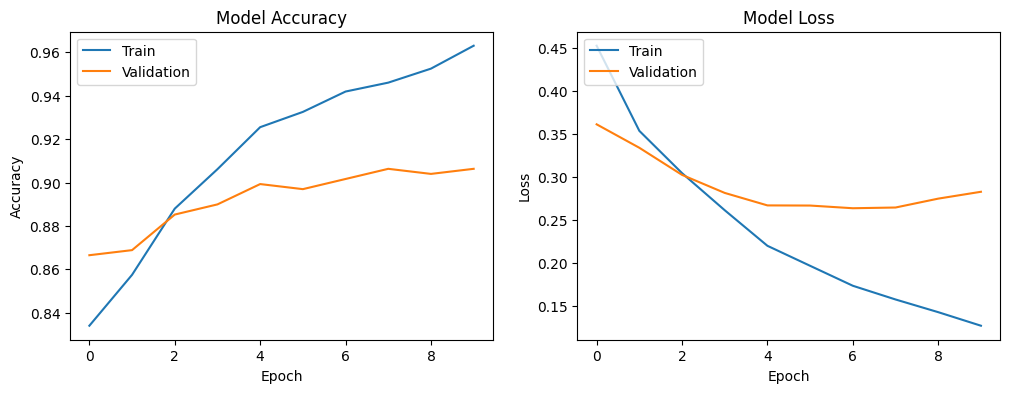

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()